In [244]:
!python --version

Python 3.6.5 :: Anaconda, Inc.


In [1]:
pwd

'C:\\Users\\이동환\\Desktop'

# 검색어, 정렬기준, 검색기간 설정

In [273]:
# 네이버에서 검색어 입력받아 검색 한 후 블로그 메뉴를 선택하고
# 오른쪽에 있는 검색옵션 버튼을 눌러서
# 정렬 방식과 기간을 입력하기

#Step 0. 필요한 모듈과 라이브러리를 로딩하고 검색어를 입력 받습니다.

import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from selenium import webdriver
import time
import tqdm
from tqdm import tqdm_notebook

### ★입력해야 할 부분★

In [279]:
query_txt = input('1.크롤링할 키워드는 무엇입니까?: ')
# query_txt2 = input('2.제외할 첫번째 키워드를 입력하세요: ')
# query_txt3 = input('3.제외할 두번째 키워드를 입력하세요: ')

start_date = input('4.조회를 시작할 날짜를 입력하세요(예:2017-01-01) :')
end_date = input('5.조회를 종료할 날짜를 입력하세요(예:2017-12-31): ')

1.크롤링할 키워드는 무엇입니까?: 이재용
4.조회를 시작할 날짜를 입력하세요(예:2017-01-01) :20200601
5.조회를 종료할 날짜를 입력하세요(예:2017-12-31): 20200607


In [280]:
#Step 1. 크롬 웹브라우저 실행
path = "chromedriver.exe"
driver = webdriver.Chrome(path)
# 사이트 주소는 네이버
driver.get('http://www.naver.com')
time.sleep(2)

#Step 2. 네이버 검색창에 "이재용" 검색
element = driver.find_element_by_id("query")
element.send_keys(query_txt)  # query_txt는 위에서 입력한 '이재용'
element.submit()

#Step 3. "블로그" 카테고리 선택
driver.find_element_by_link_text("블로그").click( )    # .click() 괄호 안을 눌러라는 뜻

#Step 4. 오른쪽의 검색 옵션 버튼 클릭
driver.find_element_by_id("_search_option_btn").click( )

#Step 5. 정렬 : "관련도순" 
# 개발자 도구에서 정렬 버튼의 id 가 보이지 않습니다.
# 이럴 경우 쉽게 사용할 수 있는 방법이 바로 xpath 를 이용하는 방법입니다.
# xpath는 개발자 도구에서 해당 메뉴 부분을 마우스 오른쪽 버튼을 누르고 
# copy -> copy xpath 를 선택하면 됩니다
# xpath 에 대한 자세한 내용은 이번 장의 뒷 부분을 참고하세요.

driver.find_element_by_xpath("""//*[@id="snb"]/div/ul/li[1]/a""").click( )  # 정렬 버튼의 xpath 클릭
driver.find_element_by_xpath("""//*[@id="snb"]/div/ul/li[1]/div/ul/li[1]/a""").click( ) # 관련도순 xpath

In [281]:
#Step 6. 날짜 입력
driver.find_element_by_xpath("""//*[@id="snb"]/div/ul/li[2]/a""").click()
time.sleep(2)

# 이 부분이 아주 중요합니다.
# 날짜 부분에 날짜를 입력할 때 입력 속도가 너무 빠를 경우 날짜가 입력이 되다가 
# 오타가 나오는 경우가 많습니다.
# 그래서 날짜를 입력할 때 for 반복문을 사용해서 1 글자씩 입력하도록 코딩했습니다.

# 시작 날짜 입력하기
s_date = driver.find_element_by_xpath("""//*[@id="blog_input_period_begin"]""")     
driver.find_element_by_xpath("""//*[@id="blog_input_period_begin"]""").click()
s_date.clear( )  # 날짜 입력 부분에 기존에 입력되어 있던 날짜를 제거합니다. 
time.sleep(1)
# 아래 코드가 날짜를 for 반복문으로 1 글자씩 입력하는 부분입니다.
for c in start_date:
    s_date.send_keys(c)
    time.sleep(0.3)
    
# 종료 날짜 입력하기
e_date = driver.find_element_by_xpath("""//*[@id="blog_input_period_end"]""")
driver.find_element_by_xpath("""//*[@id="blog_input_period_end"]""").click()
e_date.clear()
time.sleep(1)

for c in end_date:
    e_date.send_keys(c)
    time.sleep(0.3)
    
# Step7. 날짜 입력 "적용하기" 버튼을 클릭 합니다.  
driver.find_element_by_class_name("tx").click()
time.sleep(2)

In [111]:
# # Step 8. 상세 검색버튼을 클릭 후 제외할 단어들을 설정합니다.
# ele2 = driver.find_element_by_id("inpop3")
# ele2.send_keys(query_txt2)
# ele2.send_keys(',')
# ele2.send_keys(query_txt3)
# driver.find_element_by_css_selector(".btn_ft.ty_green._search").click( )

# 1. 영장 전 제목 크롤링

## 글 url,제목 크롤링

In [282]:
titles = "a.sh_blog_title._sp_each_url._sp_each_title"
article_raw = driver.find_elements_by_css_selector(titles)              
article_raw

[<selenium.webdriver.remote.webelement.WebElement (session="ee64043e7fb06319ed657b500c3b2e1c", element="0.16009794330880656-1")>,
 <selenium.webdriver.remote.webelement.WebElement (session="ee64043e7fb06319ed657b500c3b2e1c", element="0.16009794330880656-2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="ee64043e7fb06319ed657b500c3b2e1c", element="0.16009794330880656-3")>,
 <selenium.webdriver.remote.webelement.WebElement (session="ee64043e7fb06319ed657b500c3b2e1c", element="0.16009794330880656-4")>,
 <selenium.webdriver.remote.webelement.WebElement (session="ee64043e7fb06319ed657b500c3b2e1c", element="0.16009794330880656-5")>,
 <selenium.webdriver.remote.webelement.WebElement (session="ee64043e7fb06319ed657b500c3b2e1c", element="0.16009794330880656-6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="ee64043e7fb06319ed657b500c3b2e1c", element="0.16009794330880656-7")>,
 <selenium.webdriver.remote.webelement.WebElement (session="ee64043e7fb06319ed657b500c3b2e

In [284]:
url_list = []
title_list = []

total_page = 99
for i in tqdm_notebook(range(0, total_page)):  # 페이지 번호
    i = i*10 + 1
    url = "https://search.naver.com/search.naver?date_from=20200601&date_option=8&date_to=20200607&dup_remove=1&nso=p%3Afrom20200601to20200607&post_blogurl=&post_blogurl_without=&query=%EC%9D%B4%EC%9E%AC%EC%9A%A9&sm=tab_pge&srchby=all&st=sim&where=post&start={}".format(i)
    driver.get(url)
    time.sleep(0.5)
    
    # URL 크롤링 시작
    titles = "a.sh_blog_title._sp_each_url._sp_each_title"
    article_raw = driver.find_elements_by_css_selector(titles)
#     article_raw

    # url 크롤링 시작    
    for article in article_raw:
        url = article.get_attribute('href')   
        url_list.append(url)
    
    # 제목 크롤링 시작    
    for article in article_raw:
        title = article.get_attribute('title')   
        title_list.append(title)
    
        print(title)
    
print(len(url_list))
print(len(title_list))

뉴스에서 악재를 너무 자주 내보내면 ? 삼성전자 이재용부회장 구속.. 팔아야하나??
이재용 가격비교 삼성가 사람들 이야기:창업주 이병철에서 3세경영 이재용까지, 성안북스
삼성전자 이재용 부회장 영장청구...
보수우파 기독교인은 이재용 사건을 어떻게 바라봐야 하나
검찰 이재용 삼성전자 부회장 구속영장 청구
삼성 이재용 부회장의 구속영장 청구를 보고...
이재용 구속 영장 청구 - 항상 숨겨진 그림을 잘 찾아내고 이해해야 합니다.
이재용 삼성전자 부회장에 대한 구속영장 청구라? 검찰도 두 갈래. 한쪽은 우국파 다른 한쪽은 그 반대/최석태/
[브리핑] 김종철 대변인, 이재용 부회장 구속영장 청구 관련
이재용 구속영장 신청... 댓글이 가관이네요...
이재용 구속 허경영 일침 & 21세기는 허경영 시대다!
삼성의 이재용 구속 심사
[브랜드평판]  CEO 브랜드 2020년 6월 빅데이터 분석결과... 1위 SK 최태원, 2위 롯데 신동빈,  3위 삼성 이재용
이재용 부회장, 구속영장 청구
[김광일의 입] 삼성 이재용의 반란
삼성 6일 이재용 부회장이 직접 경영권승계작업 보고받았다는 일부 언론 보도 전면 부인
삼성 이재용 다시 구속 위기
삼전 이재용 부회장 구속영장 청구 / 서울중앙지검 경제범죄형사부
이재용 구속영장 청구 기사를 보며....
이재용을 다루는 모범 사례
이재용 삼성전자 부회장 구속영장 청구
이복현 검사의 승부수 ·· ‘이재용’에 날린 구속영장
구서동한정식 배우 이재용씨 단골집 :D 금정한정식에서 고등어구이정식 먹고 왔어요!
이재용 측 "영장청구 유감…검찰 신뢰하겠나" [전문](출처 한국경제TV)
이재용이 부모에게 배우지 못한 것
속보] 檢, 이재용 삼성전자 부회장 구속영장 청구
삼성.. 이재용 구속? 뭐가 문제일까?
2020.06.04(목)세계일보_이재용 구속 기로
이재용 '운명의 날' 앞둔 삼성 "韓경제 위기극복 길 열어달라"
필리핀에 소개된 삼성그룹 이재용 부회장 관련 소식
삼성 리스크 또? 검찰의 이재용 부회장 영장청구... 안갯속으로_이재용 구속시 

국내) 이재용 재판 - 355일 만에 땅에서 웃다
[종합-뉴스] 이재용 구속영장 청구…“권리 무력화 안타까워” /  6월 10일부터 카톡 보낼 때 돈 내야 하나? / [2020-06-05-금]
[매일산업뉴스]이재용 부회장, '반도체 초격차' 속도낸다 ...내년 하반기 7세대 V낸드 생산
[주진우의 '주기자 라이브'] 언론이 말하지 않는 한명숙, 그리고 이재용
이재용 사과 뒤 달라지는 삼성, 삼성생명도 암보험 갈등 바뀌어야
이재용 구속영장 청구한 이복현 검사는 누구? _김정필
[김광일의 입] 삼성 이재용의 반란
e비즈니스 관련기사 – 삼바가 기가 막혀...이재용 영장청구한 날, 주가는 최고가
이재용 운명 D-1···삼성 "위기극복 위해 경영정상화 절실" 호소
이재용 영장심사 '창과 방패'…전·현직 특수통 총출동
오늘 부터 이재용회장을 대통령만들기 합시다!
'새 삼성' 선언한 이재용 '400조 비메모리반도체 1위' 꿈 영근다
이재용 "투자 멈춰선 안돼"..열흘만에 또 반도체 투자 발표
기어코 삼성을 잡고 말겠다는 문재인 정권, 이재용 '정면승부 카드' 낸 다음날, 검찰 구속영장 청구
이재용 측 ‘시민에게 판단을 맡기겠다’ 검찰수사심의위원회 소집 신청
◇수사심의위 소집 요청한 이재용…기소 여부, 검찰 외부에서 결론 가능성◇
이재용, 평택에 8조 더..세계 최첨단 복합 반도체 기지 탄생
[속보] 검찰, 이재용 삼성전자 부회장 구속영장 청구 / YTN
[김광일의 입] 삼성 이재용의 반란
[RNB 긴급] 검찰, 삼성 이재용 부회장 구속영장 청구.. 국부의 상징, 삼성을 살리자
[한국일보]_삼성수사심의위 신청 '거부'한 검의 이재용 영장청구_200605
[공유] "시간없다"던 이재용…삼성, 평택 낸드 공장에 9조 투자출처 : 머니투데이 | 네이버
[김광일의 입] 삼성 이재용의 반란
한동훈 검색하니 양승태, 이재용 따라와... '그 사건 그 검사' 사이트를 아시나요
이재용 영장심사 D-1...외신들 "SAMSUNG" 불확실성 커졌다" ..삼성의 이재용 부회장이 대한민국 진단

최상훈 감독 & 오지호-신소율-정의욱의 코믹 액션 <태백권>, 2020.06.01 크랭크업!


2021학년도 숙명여자대학교 체육교육과 수시모집요강은 체대입시FA


[6/4 직장인 주린이 주식 일기] 잔고: 260,133원 수익, 수익률 5.49%. 수익실현: 34,589원, 14.04%(삼성전자, 삼성 SDI, 카카오)매일 주식, 부자 공부



[한경]서울 집값 하락 멈췄다…非강남 급등 20.06.05 (feat. 부동산 면)



평택고덕 상가  마사지샵으로 투자대박 고덕 삼성전자 바로 앞 창신 베스트 상가 분양정보
삼성이라는 기업의 - 정신, 문화, 사회, 경제, 정치를 말하고자 한다.
[한경]與野의 위험한 '기본소득' 경쟁 20.06.04 (feat. 부동산 면)


[모닝경제 칼럼] 달라진 '척'만 하고, 자성·반성·개선의지 전혀 안보이는 '삼성'







H(0603)104th. k 2147,Q737, 외인매수,삼성전자,삼성중공업,28조거래(+6)


파파로티(한석규,이제훈)/그대 내게 행복을 주는 사람(OST)/그리고 김호중









◇1년간 38번 '檢소환'…삼성 '수사 적정성 판단' 요청한 이유는◇










'국정농단' 대법원 선고 + 파기환송심 ... 삼성 계열사, 준법감시위 권고 이행 방안 제출


삼성 평택 투자안 발표 10조 받고 8조 더? 삼성 평택 시너지 기대합니다.













다들 어디서 블로그 에피소드를 만드는지 나만 히키코모리처럼 살고있는건지



'포스트 코로나' 지분가치 증감 TOP10…서정진, 김범수, 김택진 증감 1~3위

[경제뉴스] 美·中 싸움에 대만 반사이익…화웨이·미디어텍 손잡다 [Chosun.com_2020-06-08]

[6/5 직장인 주린이 주식 일기] 잔고: 259,810원 수익, 수익률 5.48%. 수익실현: 29,102원, 11.82%(삼성전자, 삼성 SDI, 카카오)매일 주식, 부자 공부





2020년 5월준공완료!! 6월부터 입주시작!!! 백석남광하우스토리 엔

In [285]:
df = pd.DataFrame({'url':url_list, 'title':title_list})
df

,url,title
0,https://blog.naver.com/collera?Redirect=Log&lo...,뉴스에서 악재를 너무 자주 내보내면 ? 삼성전자 이재용부회장 구속.. 팔아야하나??
1,http://blog.daum.net/dalian_long/557,"이재용 가격비교 삼성가 사람들 이야기:창업주 이병철에서 3세경영 이재용까지, 성안북스"
2,https://umjiny.blog.me/221991919620,삼성전자 이재용 부회장 영장청구...
3,https://blog.naver.com/faithshield?Redirect=Lo...,보수우파 기독교인은 이재용 사건을 어떻게 바라봐야 하나
4,https://blog.naver.com/johnkth?Redirect=Log&lo...,검찰 이재용 삼성전자 부회장 구속영장 청구
5,https://blog.naver.com/kkwmmk?Redirect=Log&log...,삼성 이재용 부회장의 구속영장 청구를 보고...
6,https://blog.naver.com/s2ethan?Redirect=Log&lo...,이재용 구속 영장 청구 - 항상 숨겨진 그림을 잘 찾아내고 이해해야 합니다.
7,https://blog.naver.com/choisttt?Redirect=Log&l...,이재용 삼성전자 부회장에 대한 구속영장 청구라? 검찰도 두 갈래. 한쪽은 우국파 다...
8,http://jcjinbo.net/221990507636,"[브리핑] 김종철 대변인, 이재용 부회장 구속영장 청구 관련"
9,https://blog.naver.com/bigredcu?Redirect=Log&l...,이재용 구속영장 신청... 댓글이 가관이네요...


In [286]:
# 저장하기
df.to_excel("blog_title_before({}).xlsx".format(query_txt))

In [287]:
pwd

'C:\\Users\\이동환\\Desktop'

### 영장 후 제목으로 텍스트 분석

- 분석 알고리즘 : konlpy를 사용하여 한글 형태소 분석

In [288]:
# !pip install graphviz
# !pip install konlpy

import scipy as sp
import pandas as pd
import numpy as np

from konlpy.tag import Kkma       ; kkma = Kkma()
from konlpy.tag import Hannanum   ; hannanum = Hannanum()
from konlpy.tag import Okt        ; t = Okt()
from konlpy.tag import *
import pickle

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 그래프
%matplotlib inline
import os
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz             
from sklearn.tree import export_graphviz

# 그래프에서 한글 폰트 깨지는 문제에 대한 대처(전역 글꼴 설정)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

# 워닝 없애주는 것
import warnings  
warnings.filterwarnings('ignore')

In [290]:
df_r = pd.read_excel("blog_title_before(이재용).xlsx")
df_r

,url,title
0,https://blog.naver.com/collera?Redirect=Log&lo...,뉴스에서 악재를 너무 자주 내보내면 ? 삼성전자 이재용부회장 구속.. 팔아야하나??
1,http://blog.daum.net/dalian_long/557,"이재용 가격비교 삼성가 사람들 이야기:창업주 이병철에서 3세경영 이재용까지, 성안북스"
2,https://umjiny.blog.me/221991919620,삼성전자 이재용 부회장 영장청구...
3,https://blog.naver.com/faithshield?Redirect=Lo...,보수우파 기독교인은 이재용 사건을 어떻게 바라봐야 하나
4,https://blog.naver.com/johnkth?Redirect=Log&lo...,검찰 이재용 삼성전자 부회장 구속영장 청구
5,https://blog.naver.com/kkwmmk?Redirect=Log&log...,삼성 이재용 부회장의 구속영장 청구를 보고...
6,https://blog.naver.com/s2ethan?Redirect=Log&lo...,이재용 구속 영장 청구 - 항상 숨겨진 그림을 잘 찾아내고 이해해야 합니다.
7,https://blog.naver.com/choisttt?Redirect=Log&l...,이재용 삼성전자 부회장에 대한 구속영장 청구라? 검찰도 두 갈래. 한쪽은 우국파 다...
8,http://jcjinbo.net/221990507636,"[브리핑] 김종철 대변인, 이재용 부회장 구속영장 청구 관련"
9,https://blog.naver.com/bigredcu?Redirect=Log&l...,이재용 구속영장 신청... 댓글이 가관이네요...


In [291]:
df_r['title']

0         뉴스에서 악재를 너무 자주 내보내면 ? 삼성전자 이재용부회장 구속.. 팔아야하나??
1        이재용 가격비교 삼성가 사람들 이야기:창업주 이병철에서 3세경영 이재용까지, 성안북스
2                                   삼성전자 이재용 부회장 영장청구...
3                         보수우파 기독교인은 이재용 사건을 어떻게 바라봐야 하나
4                                검찰 이재용 삼성전자 부회장 구속영장 청구
5                             삼성 이재용 부회장의 구속영장 청구를 보고...
6             이재용 구속 영장 청구 - 항상 숨겨진 그림을 잘 찾아내고 이해해야 합니다.
7      이재용 삼성전자 부회장에 대한 구속영장 청구라? 검찰도 두 갈래. 한쪽은 우국파 다...
8                      [브리핑] 김종철 대변인, 이재용 부회장 구속영장 청구 관련
9                            이재용 구속영장 신청... 댓글이 가관이네요...
10                        이재용 구속 허경영 일침 & 21세기는 허경영 시대다!
11                                         삼성의 이재용 구속 심사
12     [브랜드평판]  CEO 브랜드 2020년 6월 빅데이터 분석결과... 1위 SK 최...
13                                      이재용 부회장, 구속영장 청구
14                                   [김광일의 입] 삼성 이재용의 반란
15       삼성 6일 이재용 부회장이 직접 경영권승계작업 보고받았다는 일부 언론 보도 전면 부인
16                                       삼성 이재용 다시 구속 위기
17                   삼전 이재용 부회장

In [292]:
content_list = df_r.title.values.tolist()

print(len(content_list))
content_list

990


['뉴스에서 악재를 너무 자주 내보내면 ? 삼성전자 이재용부회장 구속.. 팔아야하나??',
 '이재용 가격비교 삼성가 사람들 이야기:창업주 이병철에서 3세경영 이재용까지, 성안북스',
 '삼성전자 이재용 부회장 영장청구...',
 '보수우파 기독교인은 이재용 사건을 어떻게 바라봐야 하나',
 '검찰 이재용 삼성전자 부회장 구속영장 청구',
 '삼성 이재용 부회장의 구속영장 청구를 보고...',
 '이재용 구속 영장 청구 - 항상 숨겨진 그림을 잘 찾아내고 이해해야 합니다.',
 '이재용 삼성전자 부회장에 대한 구속영장 청구라? 검찰도 두 갈래. 한쪽은 우국파 다른 한쪽은 그 반대/최석태/',
 '[브리핑] 김종철 대변인, 이재용 부회장 구속영장 청구 관련',
 '이재용 구속영장 신청... 댓글이 가관이네요...',
 '이재용 구속 허경영 일침 & 21세기는 허경영 시대다!',
 '삼성의 이재용 구속 심사',
 '[브랜드평판]  CEO 브랜드 2020년 6월 빅데이터 분석결과... 1위 SK 최태원, 2위 롯데 신동빈,  3위 삼성 이재용',
 '이재용 부회장, 구속영장 청구',
 '[김광일의 입] 삼성 이재용의 반란',
 '삼성 6일 이재용 부회장이 직접 경영권승계작업 보고받았다는 일부 언론 보도 전면 부인',
 '삼성 이재용 다시 구속 위기',
 '삼전 이재용 부회장 구속영장 청구 / 서울중앙지검 경제범죄형사부',
 '이재용 구속영장 청구 기사를 보며....',
 '이재용을 다루는 모범 사례',
 '이재용 삼성전자 부회장 구속영장 청구',
 '이복현 검사의 승부수 ·· ‘이재용’에 날린 구속영장',
 '구서동한정식 배우 이재용씨 단골집 :D 금정한정식에서 고등어구이정식 먹고 왔어요!',
 '이재용 측 "영장청구 유감…검찰 신뢰하겠나" [전문](출처 한국경제TV)',
 '이재용이 부모에게 배우지 못한 것',
 '속보] 檢, 이재용 삼성전자 부회장 구속영장 청구',
 '삼성.. 이재용 구속? 뭐가 문제일까?',
 '2020.06.04(목)세계일보_이재용 구속 기

In [293]:
import nltk
from konlpy.tag import Okt; t = Okt()

In [294]:
# 리스트 중 str 타입이 아닌 요소들이 존재함을 확인
for i in content_list:
    if type(i) == float:
        i = str(i)
        print(i)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [295]:
# str 타입이 아닌 요소들이 있으면 전부 str 타입으로 바꿔라!
for i in range(len(content_list)):
    if type(content_list[i]) != str:
        content_list[i] = str(content_list[i])

In [296]:
content_text = ''

for each_line in content_list[:2000]:
    content_text = content_text + each_line + '\n'

In [297]:
content_text

'뉴스에서 악재를 너무 자주 내보내면 ? 삼성전자 이재용부회장 구속.. 팔아야하나??\n이재용 가격비교 삼성가 사람들 이야기:창업주 이병철에서 3세경영 이재용까지, 성안북스\n삼성전자 이재용 부회장 영장청구...\n보수우파 기독교인은 이재용 사건을 어떻게 바라봐야 하나\n검찰 이재용 삼성전자 부회장 구속영장 청구\n삼성 이재용 부회장의 구속영장 청구를 보고...\n이재용 구속 영장 청구 - 항상 숨겨진 그림을 잘 찾아내고 이해해야 합니다.\n이재용 삼성전자 부회장에 대한 구속영장 청구라? 검찰도 두 갈래. 한쪽은 우국파 다른 한쪽은 그 반대/최석태/\n[브리핑] 김종철 대변인, 이재용 부회장 구속영장 청구 관련\n이재용 구속영장 신청... 댓글이 가관이네요...\n이재용 구속 허경영 일침 & 21세기는 허경영 시대다!\n삼성의 이재용 구속 심사\n[브랜드평판]  CEO 브랜드 2020년 6월 빅데이터 분석결과... 1위 SK 최태원, 2위 롯데 신동빈,  3위 삼성 이재용\n이재용 부회장, 구속영장 청구\n[김광일의 입] 삼성 이재용의 반란\n삼성 6일 이재용 부회장이 직접 경영권승계작업 보고받았다는 일부 언론 보도 전면 부인\n삼성 이재용 다시 구속 위기\n삼전 이재용 부회장 구속영장 청구 / 서울중앙지검 경제범죄형사부\n이재용 구속영장 청구 기사를 보며....\n이재용을 다루는 모범 사례\n이재용 삼성전자 부회장 구속영장 청구\n이복현 검사의 승부수 ·· ‘이재용’에 날린 구속영장\n구서동한정식 배우 이재용씨 단골집 :D 금정한정식에서 고등어구이정식 먹고 왔어요!\n이재용 측 "영장청구 유감…검찰 신뢰하겠나" [전문](출처 한국경제TV)\n이재용이 부모에게 배우지 못한 것\n속보] 檢, 이재용 삼성전자 부회장 구속영장 청구\n삼성.. 이재용 구속? 뭐가 문제일까?\n2020.06.04(목)세계일보_이재용 구속 기로\n이재용 \'운명의 날\' 앞둔 삼성 "韓경제 위기극복 길 열어달라"\n필리핀에 소개된 삼성그룹 이재용 부회장 관련 소식\n삼성 리스크 또? 검

## 형태소분석을 마친 단어로 만든 token_ko

In [298]:
tokens_ko = t.morphs(content_text)
tokens_ko

['뉴스',
 '에서',
 '악재',
 '를',
 '너무',
 '자주',
 '내보내면',
 '?',
 '삼성',
 '전자',
 '이재용',
 '부회장',
 '구속',
 '..',
 '팔',
 '아야',
 '하',
 '나',
 '??',
 '\n',
 '이재용',
 '가격',
 '비교',
 '삼성',
 '가',
 '사람',
 '들',
 '이야기',
 ':',
 '창업',
 '주',
 '이병철',
 '에서',
 '3',
 '세',
 '경영',
 '이재용',
 '까지',
 ',',
 '성안',
 '북스',
 '\n',
 '삼성',
 '전자',
 '이재용',
 '부회장',
 '영장',
 '청구',
 '...',
 '\n',
 '보수',
 '우파',
 '기독교인',
 '은',
 '이재용',
 '사건',
 '을',
 '어떻게',
 '바라봐야',
 '하나',
 '\n',
 '검찰',
 '이재용',
 '삼성',
 '전자',
 '부회장',
 '구속영장',
 '청구',
 '\n',
 '삼성',
 '이재용',
 '부회장',
 '의',
 '구속영장',
 '청구',
 '를',
 '보고',
 '...',
 '\n',
 '이재용',
 '구속',
 '영장',
 '청구',
 '-',
 '항상',
 '숨겨진',
 '그림',
 '을',
 '잘',
 '찾아내고',
 '이해해',
 '야',
 '합니다',
 '.',
 '\n',
 '이재용',
 '삼성',
 '전자',
 '부회장',
 '에',
 '대한',
 '구속영장',
 '청구',
 '라',
 '?',
 '검찰',
 '도',
 '두',
 '갈래',
 '.',
 '한쪽',
 '은',
 '우국',
 '파',
 '다른',
 '한쪽',
 '은',
 '그',
 '반대',
 '/',
 '최',
 '석태',
 '/',
 '\n',
 '[',
 '브리핑',
 ']',
 '김종철',
 '대변인',
 ',',
 '이재용',
 '부회장',
 '구속영장',
 '청구',
 '관련',
 '\n',
 '이재용',
 '구속영장',
 '신청',
 '...',
 '댓글',
 '이

In [299]:
ko = nltk.Text(tokens_ko)   
print(len(ko.tokens))          # 토큰 전체 갯수
print(len(set(ko.tokens)))     # 토큰 unique 갯수

10168
2405


In [301]:
ko = nltk.Text(tokens_ko)
ko.vocab().most_common(100)    # 가장 많이 나온 단어 100개

[('\n', 990),
 ('nan', 449),
 ('이재용', 444),
 (',', 284),
 ('삼성', 229),
 ('청구', 146),
 ('의', 138),
 ('검찰', 133),
 ('구속영장', 130),
 ('부회장', 123),
 ("'", 122),
 ('"', 114),
 (']', 109),
 ('에', 107),
 ('[', 107),
 ('.', 87),
 ('이', 74),
 ('?', 68),
 ('전자', 67),
 ('구속', 67),
 ('/', 66),
 ('…', 65),
 (')', 63),
 ('...', 58),
 ('(', 58),
 ('영장', 54),
 ('수사', 54),
 ('-', 49),
 ('!', 47),
 ('들', 46),
 ('위', 44),
 ('한', 44),
 ('을', 41),
 ('심의', 39),
 ('뉴스', 38),
 ('는', 37),
 ('과', 37),
 ('은', 32),
 ('가', 31),
 ('판단', 30),
 ('檢', 29),
 ('‘', 28),
 ('투자', 28),
 ('..', 25),
 ('·', 25),
 ('기소', 25),
 ('’', 24),
 ('도', 23),
 ('6월', 23),
 ('위기', 23),
 ('반도체', 23),
 ('”', 23),
 ('로', 21),
 ('“', 21),
 ('성', 21),
 ('경제', 20),
 ('를', 19),
 ('심사', 19),
 ('최후', 19),
 ('카드', 19),
 ('소집', 19),
 (':', 18),
 ('신청', 18),
 ('시민', 18),
 ('요청', 18),
 ('수', 17),
 ('_', 17),
 ('또', 17),
 ('경영', 16),
 ('문재인', 16),
 ('의혹', 16),
 ('일', 16),
 ('반란', 15),
 ('한국', 15),
 ('못', 15),
 ('적', 15),
 ('더', 15),
 ('산업', 15),
 ('만에

In [302]:
# 불용어 : 인터넷 검색 시 검색 용어로 사용하지 않는 단어. 관사, 전치사, 조사, 접속사 등 검색 색인 단어로 의미가 없는 단어
stop_words = ['"(', '_', ')/', '<', '??', '4', '|', '>', '?(', '"…', '#', '&', '・', "']",'.',' ','/',"'",'’','”','“','·', '[','!','\n','·','‘','"','\n ',']',':','…',')','(','-', 'nan','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','라고','중요한','합','가요','....','보이','네','무지']

tokens_ko = [each_word for each_word in tokens_ko
             if each_word not in stop_words]

ko = nltk.Text(tokens_ko)
ko.vocab().most_common(50)

[('이재용', 444),
 ('삼성', 229),
 ('청구', 146),
 ('검찰', 133),
 ('구속영장', 130),
 ('부회장', 123),
 ('전자', 67),
 ('구속', 67),
 ('영장', 54),
 ('수사', 54),
 ('위', 44),
 ('심의', 39),
 ('뉴스', 38),
 ('판단', 30),
 ('檢', 29),
 ('투자', 28),
 ('기소', 25),
 ('6월', 23),
 ('위기', 23),
 ('반도체', 23),
 ('성', 21),
 ('경제', 20),
 ('심사', 19),
 ('최후', 19),
 ('카드', 19),
 ('소집', 19),
 ('신청', 18),
 ('시민', 18),
 ('요청', 18),
 ('또', 17),
 ('경영', 16),
 ('문재인', 16),
 ('의혹', 16),
 ('반란', 15),
 ('한국', 15),
 ('적', 15),
 ('더', 15),
 ('산업', 15),
 ('만에', 15),
 ('매', 14),
 ('+', 14),
 ('에서', 13),
 ('반격', 13),
 ('윤석열', 13),
 ('8일', 13),
 ('승계', 12),
 ('TV', 12),
 ('초', 12),
 ('내', 12),
 ('참다', 12)]

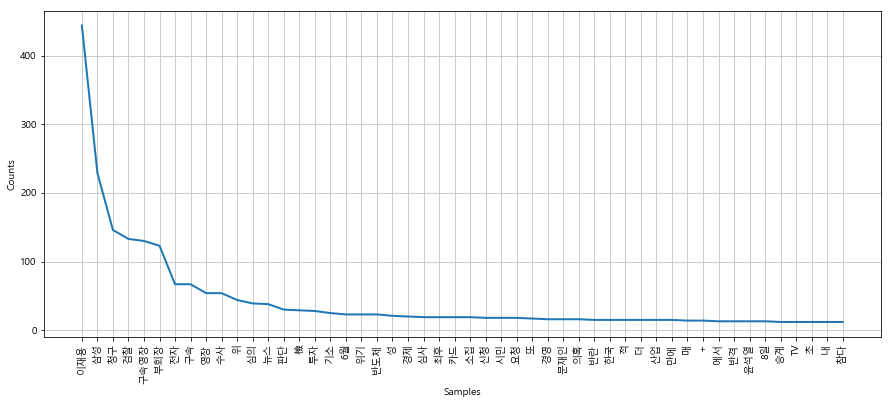

In [303]:
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz             
from sklearn.tree import export_graphviz
plt.figure(figsize=(15,6))
ko.plot(50) 
plt.show()

# 그래프에서 한글 폰트 깨지는 문제에 대한 대처(전역 글꼴 설정)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [304]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [305]:
data = ko.vocab().most_common(300)

print(len(data))
data

300


[('이재용', 444),
 ('삼성', 229),
 ('청구', 146),
 ('검찰', 133),
 ('구속영장', 130),
 ('부회장', 123),
 ('전자', 67),
 ('구속', 67),
 ('영장', 54),
 ('수사', 54),
 ('위', 44),
 ('심의', 39),
 ('뉴스', 38),
 ('판단', 30),
 ('檢', 29),
 ('투자', 28),
 ('기소', 25),
 ('6월', 23),
 ('위기', 23),
 ('반도체', 23),
 ('성', 21),
 ('경제', 20),
 ('심사', 19),
 ('최후', 19),
 ('카드', 19),
 ('소집', 19),
 ('신청', 18),
 ('시민', 18),
 ('요청', 18),
 ('또', 17),
 ('경영', 16),
 ('문재인', 16),
 ('의혹', 16),
 ('반란', 15),
 ('한국', 15),
 ('적', 15),
 ('더', 15),
 ('산업', 15),
 ('만에', 15),
 ('매', 14),
 ('+', 14),
 ('에서', 13),
 ('반격', 13),
 ('윤석열', 13),
 ('8일', 13),
 ('승계', 12),
 ('TV', 12),
 ('초', 12),
 ('내', 12),
 ('참다', 12),
 ('외부', 12),
 ('평택', 12),
 ('삼', 12),
 ('속', 12),
 ('주식', 12),
 ('유감', 11),
 ('날', 11),
 ('달라', 11),
 ('사회', 11),
 ('해달라', 11),
 ('왜', 11),
 ('4일', 11),
 ('기업', 11),
 ('서', 10),
 ('04', 10),
 ('전', 10),
 ('발표', 10),
 ('강한', 10),
 ('해', 10),
 ('그', 9),
 ('관련', 9),
 ('2020년', 9),
 ('김광일', 9),
 ('입', 9),
 ('현', 9),
 ('승부', 9),
 ('측', 9),
 ('속보', 9)

In [306]:
# list tuple을 딕셔너리로 만들어주는 함수
def todict(list_tuple):    
    todict = {}
    for i in range(0,len(list_tuple)):
        todict[data[i][0]] = data[i][1]
    return todict

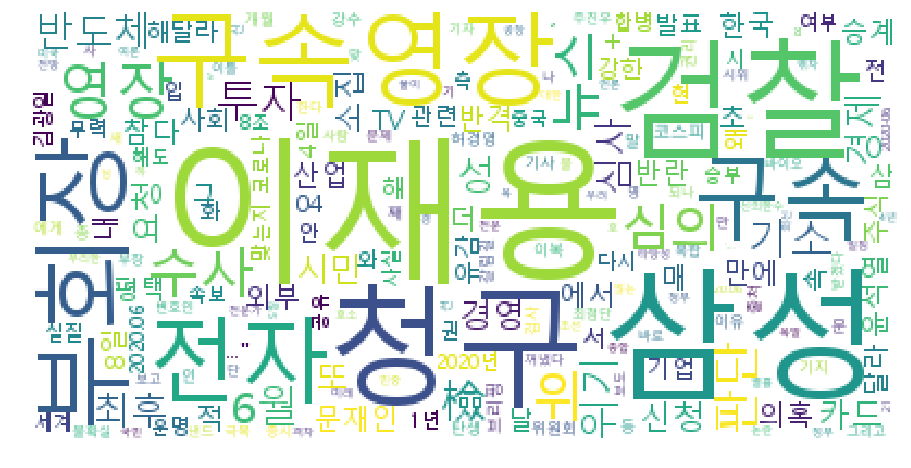

In [307]:
# 워드클라우드를 그려보자
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(todict(data))

plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()